In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

# Data Visualization

In [2]:
df = pd.read_csv('CE9010_cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               302 non-null    object 
 1   price               302 non-null    float64
 2   brand               302 non-null    object 
 3   resolution          302 non-null    object 
 4   screen_size         302 non-null    float64
 5   level_1_model       302 non-null    object 
 6   processor           302 non-null    object 
 7   processor_speed     302 non-null    float64
 8   ram                 302 non-null    float64
 9   warranty            302 non-null    int64  
 10  link                302 non-null    object 
 11  description         199 non-null    object 
 12  weight              161 non-null    float64
 13  hdd_gb              64 non-null     float64
 14  ssd_gb              230 non-null    float64
 15  graphic_card        176 non-null    object 
 16  hdd_exis

In [4]:
df['brand'].unique()

array(['apple', 'dell', 'lenovo', 'siemens', 'hp', 'aftershock',
       'fujitsu', 'asus', 'compaq', 'acer', 'msi', 'asuspro', 'panasonic',
       'toshiba', 'medion', 'gigabyte', 'microsoft', 'razer'],
      dtype=object)

In [5]:
price_brand = df[['price', 'brand']].groupby('brand').mean().sort_values('price', ascending = False)
price_brand.head()

,price
brand,
gigabyte,1536.500000
siemens,1481.325714
medion,1471.640000
msi,1419.553333
apple,1185.407907


Text(0.5, 1.0, 'AVG Price vs Brand')

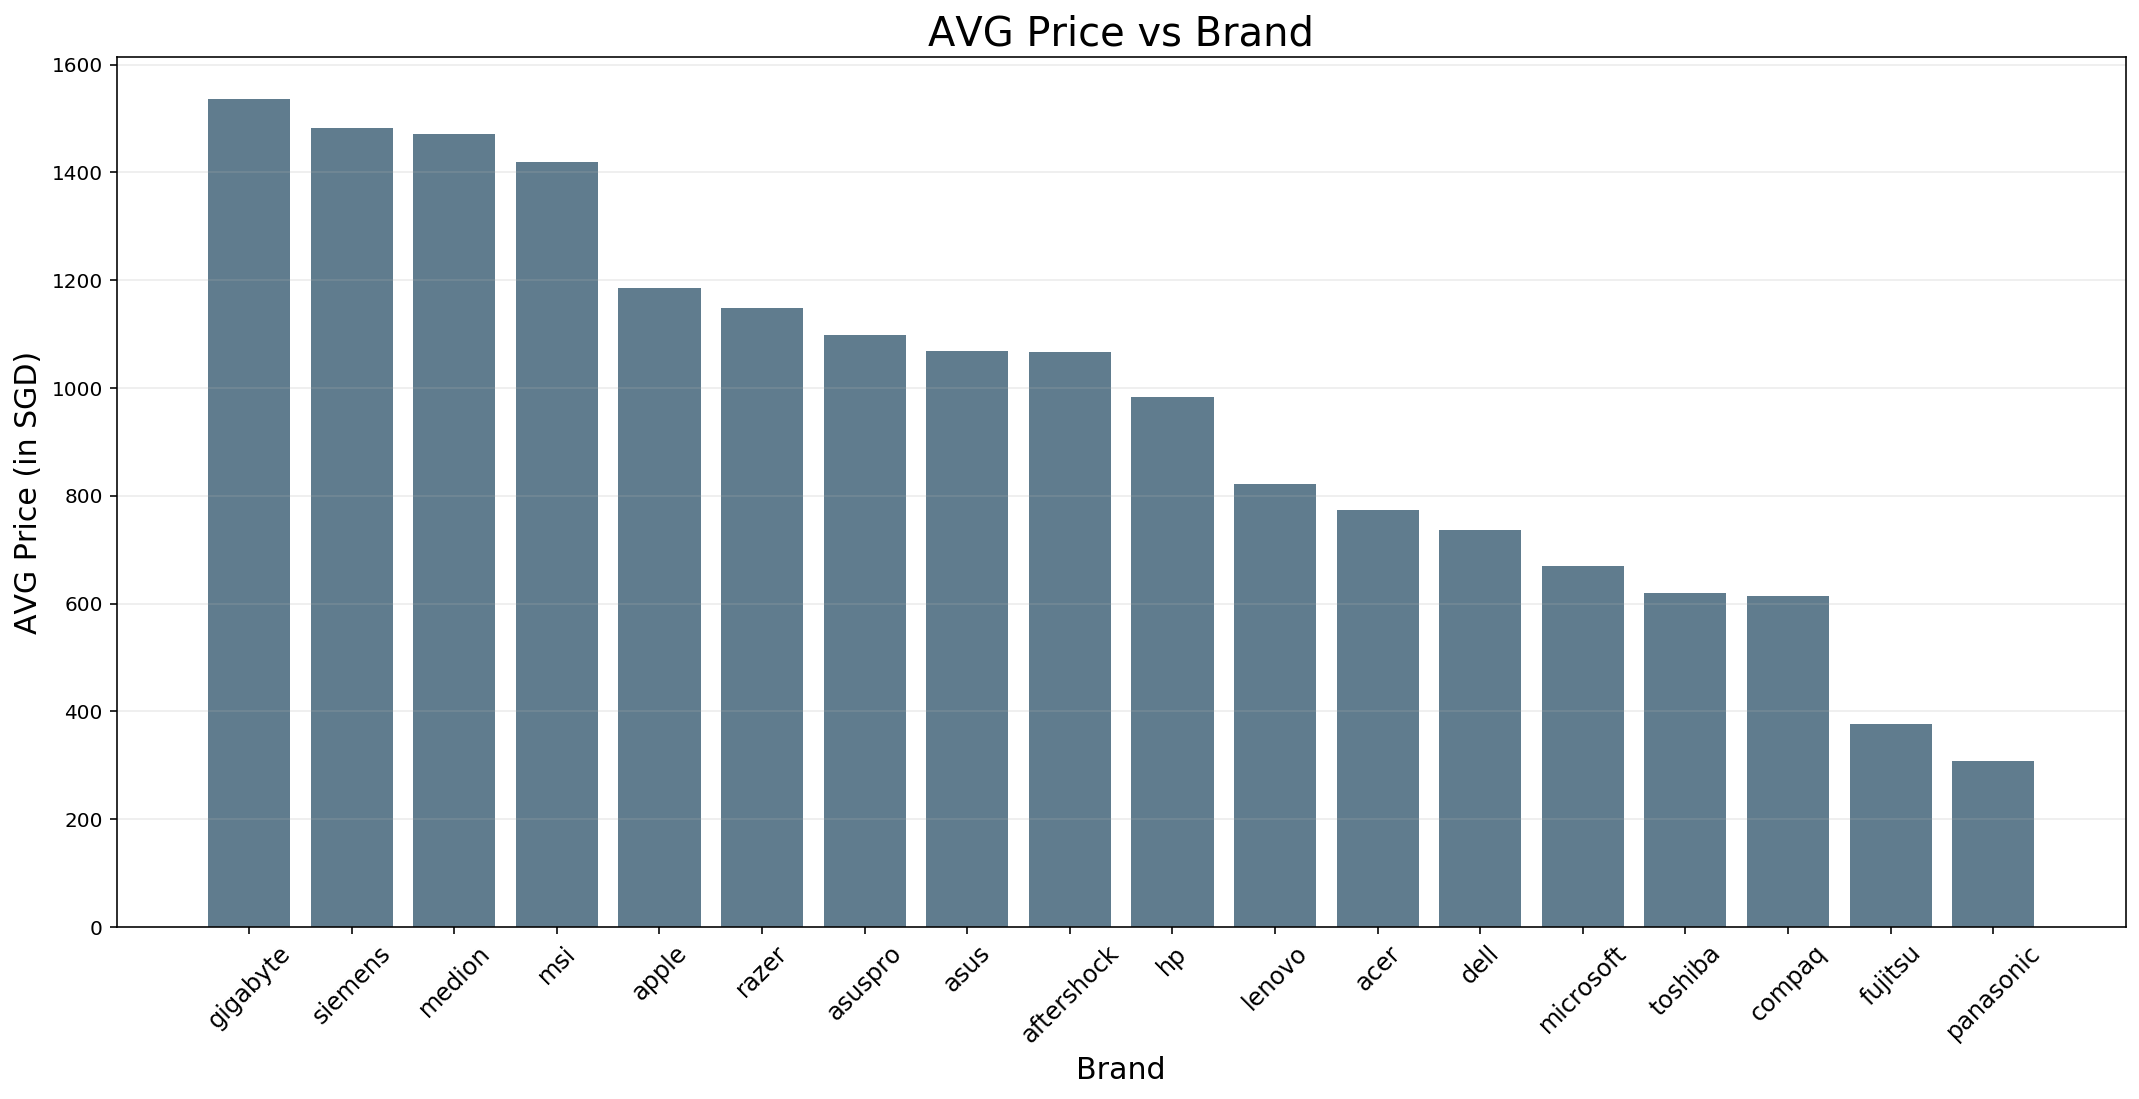

In [6]:
# version 1
colors_map = {'hp': '#003f5c', 
              'dell': '#2f4b7c', 
              'gigabyte': '#665191', 
              'asus': '#a05195', 
              'msi': '#d45087', 
              'siemens': '#f95d6a', 
              'medion': '#ff7c43',
              'apple': '#ffa600', 
              'aftershock': '#488f31', 
              'lenovo': '#bbba78', 
              'razer': '#eddbb9', 
              'asuspro': '#4a3933', 
              'acer': '#e48269',
              'toshiba': '#de425b', 
              'laptop': '#e45826', 
              'microsoft': '#85b172', 
              'compaq': '#f39189', 
              'fujitsu': '#6e7582', 
              'panasonic': '#67a052'}
plt.figure(figsize = (18,8))
# plt.bar(price_brand.index, price_brand.price, color = list(price_brand.index.map(colors_map)))
plt.bar(price_brand.index, price_brand.price, color = '#607c8e')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('AVG Price (in SGD)', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.grid(axis = 'y', linewidth = 0.2)
plt.title('AVG Price vs Brand', fontsize = 20)

In [7]:
price_l1model = df[['price', 'level_1_model']].groupby('level_1_model').mean().sort_values('price', ascending = False)
price_l1model.head()

,price
level_1_model,
zbook,2974.714286
xps,2696.090000
aero,2024.000000
rog,1999.000000
gf75,1815.040000


Text(0.5, 1.0, 'Level 1 Model vs AVG Price')

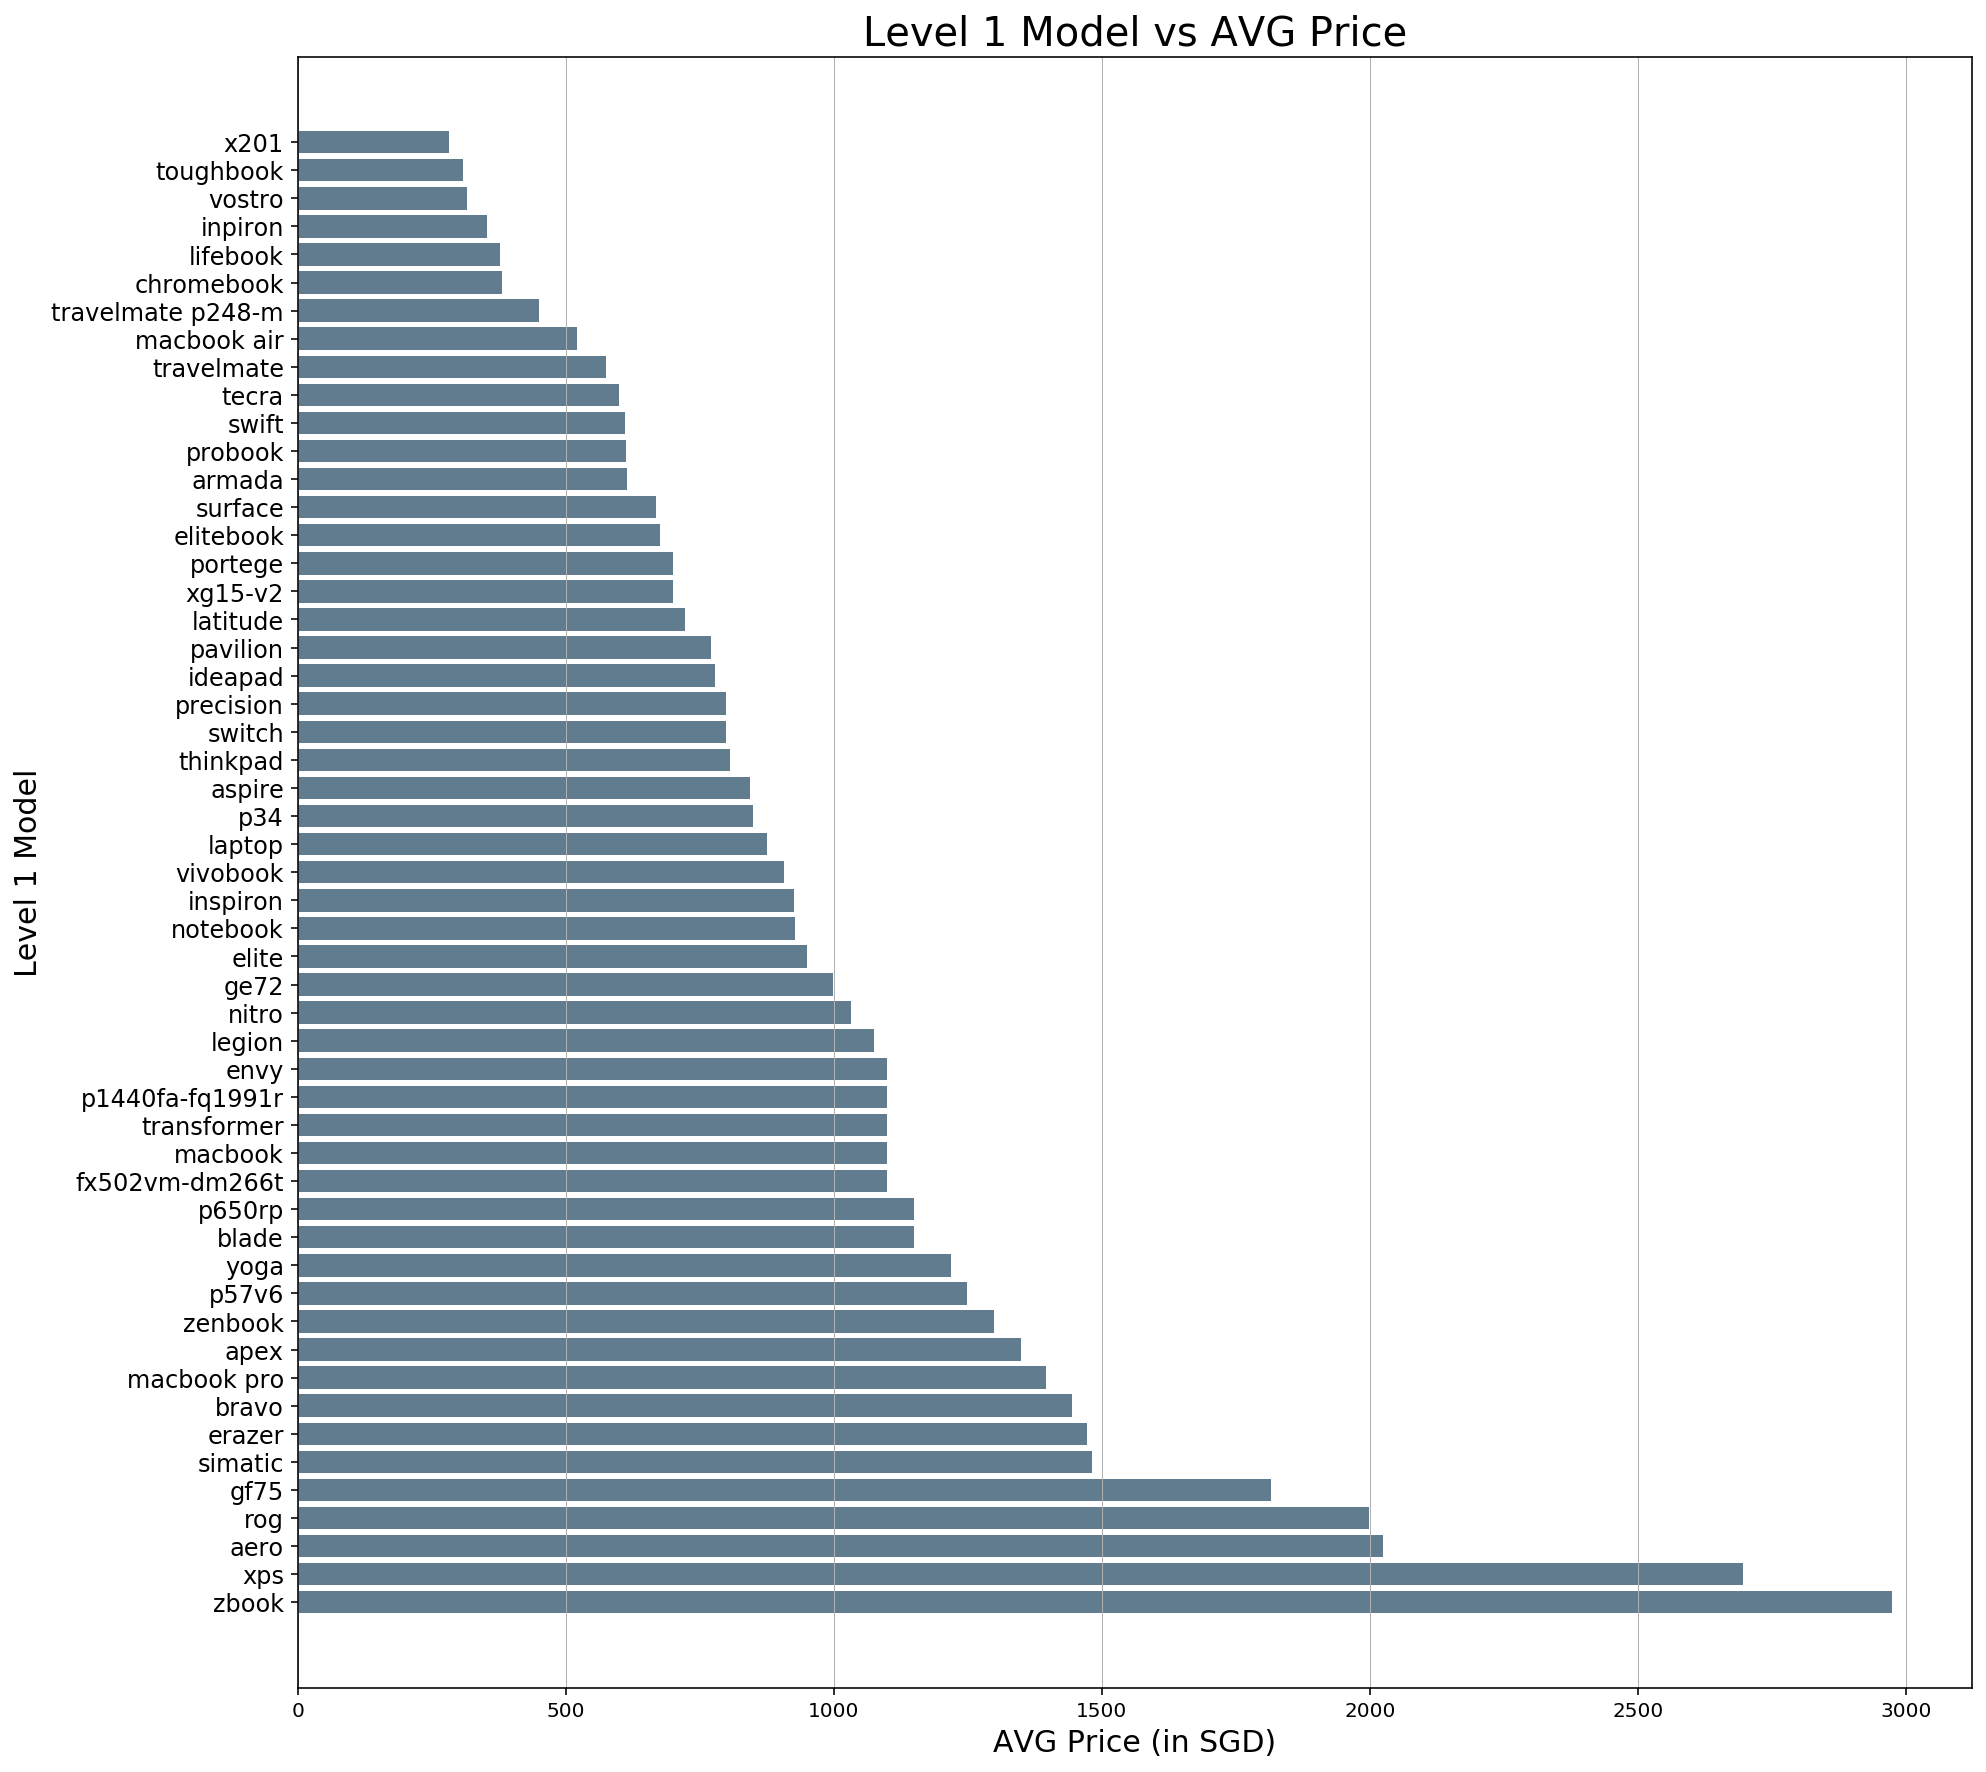

In [8]:
# version 2
plt.figure(figsize = (15,15))
plt.barh(price_l1model.index, price_l1model.price, color = '#607c8e')
plt.ylabel('Level 1 Model', fontsize = 15)
plt.xlabel('AVG Price (in SGD)', fontsize = 15)
plt.yticks(fontsize = 12)
plt.grid(axis = 'x', linewidth = 0.5)
plt.title('Level 1 Model vs AVG Price', fontsize = 20)

In [9]:
price_brmodel = df[['price', 'brand', 'level_1_model']].groupby(['brand','level_1_model']).mean().sort_values('price', ascending = False).reset_index()
price_brmodel.head()

,brand,level_1_model,price
0,hp,zbook,2974.714286
1,dell,xps,2696.090000
2,gigabyte,aero,2024.000000
3,asus,rog,1999.000000
4,msi,gf75,1815.040000


In [10]:
price_brmodel.brand.unique()

array(['hp', 'dell', 'gigabyte', 'asus', 'msi', 'siemens', 'medion',
       'apple', 'aftershock', 'lenovo', 'razer', 'asuspro', 'acer',
       'toshiba', 'microsoft', 'compaq', 'fujitsu', 'panasonic'],
      dtype=object)

Text(0.5, 1.0, 'Level 1 Model vs AVG Price')

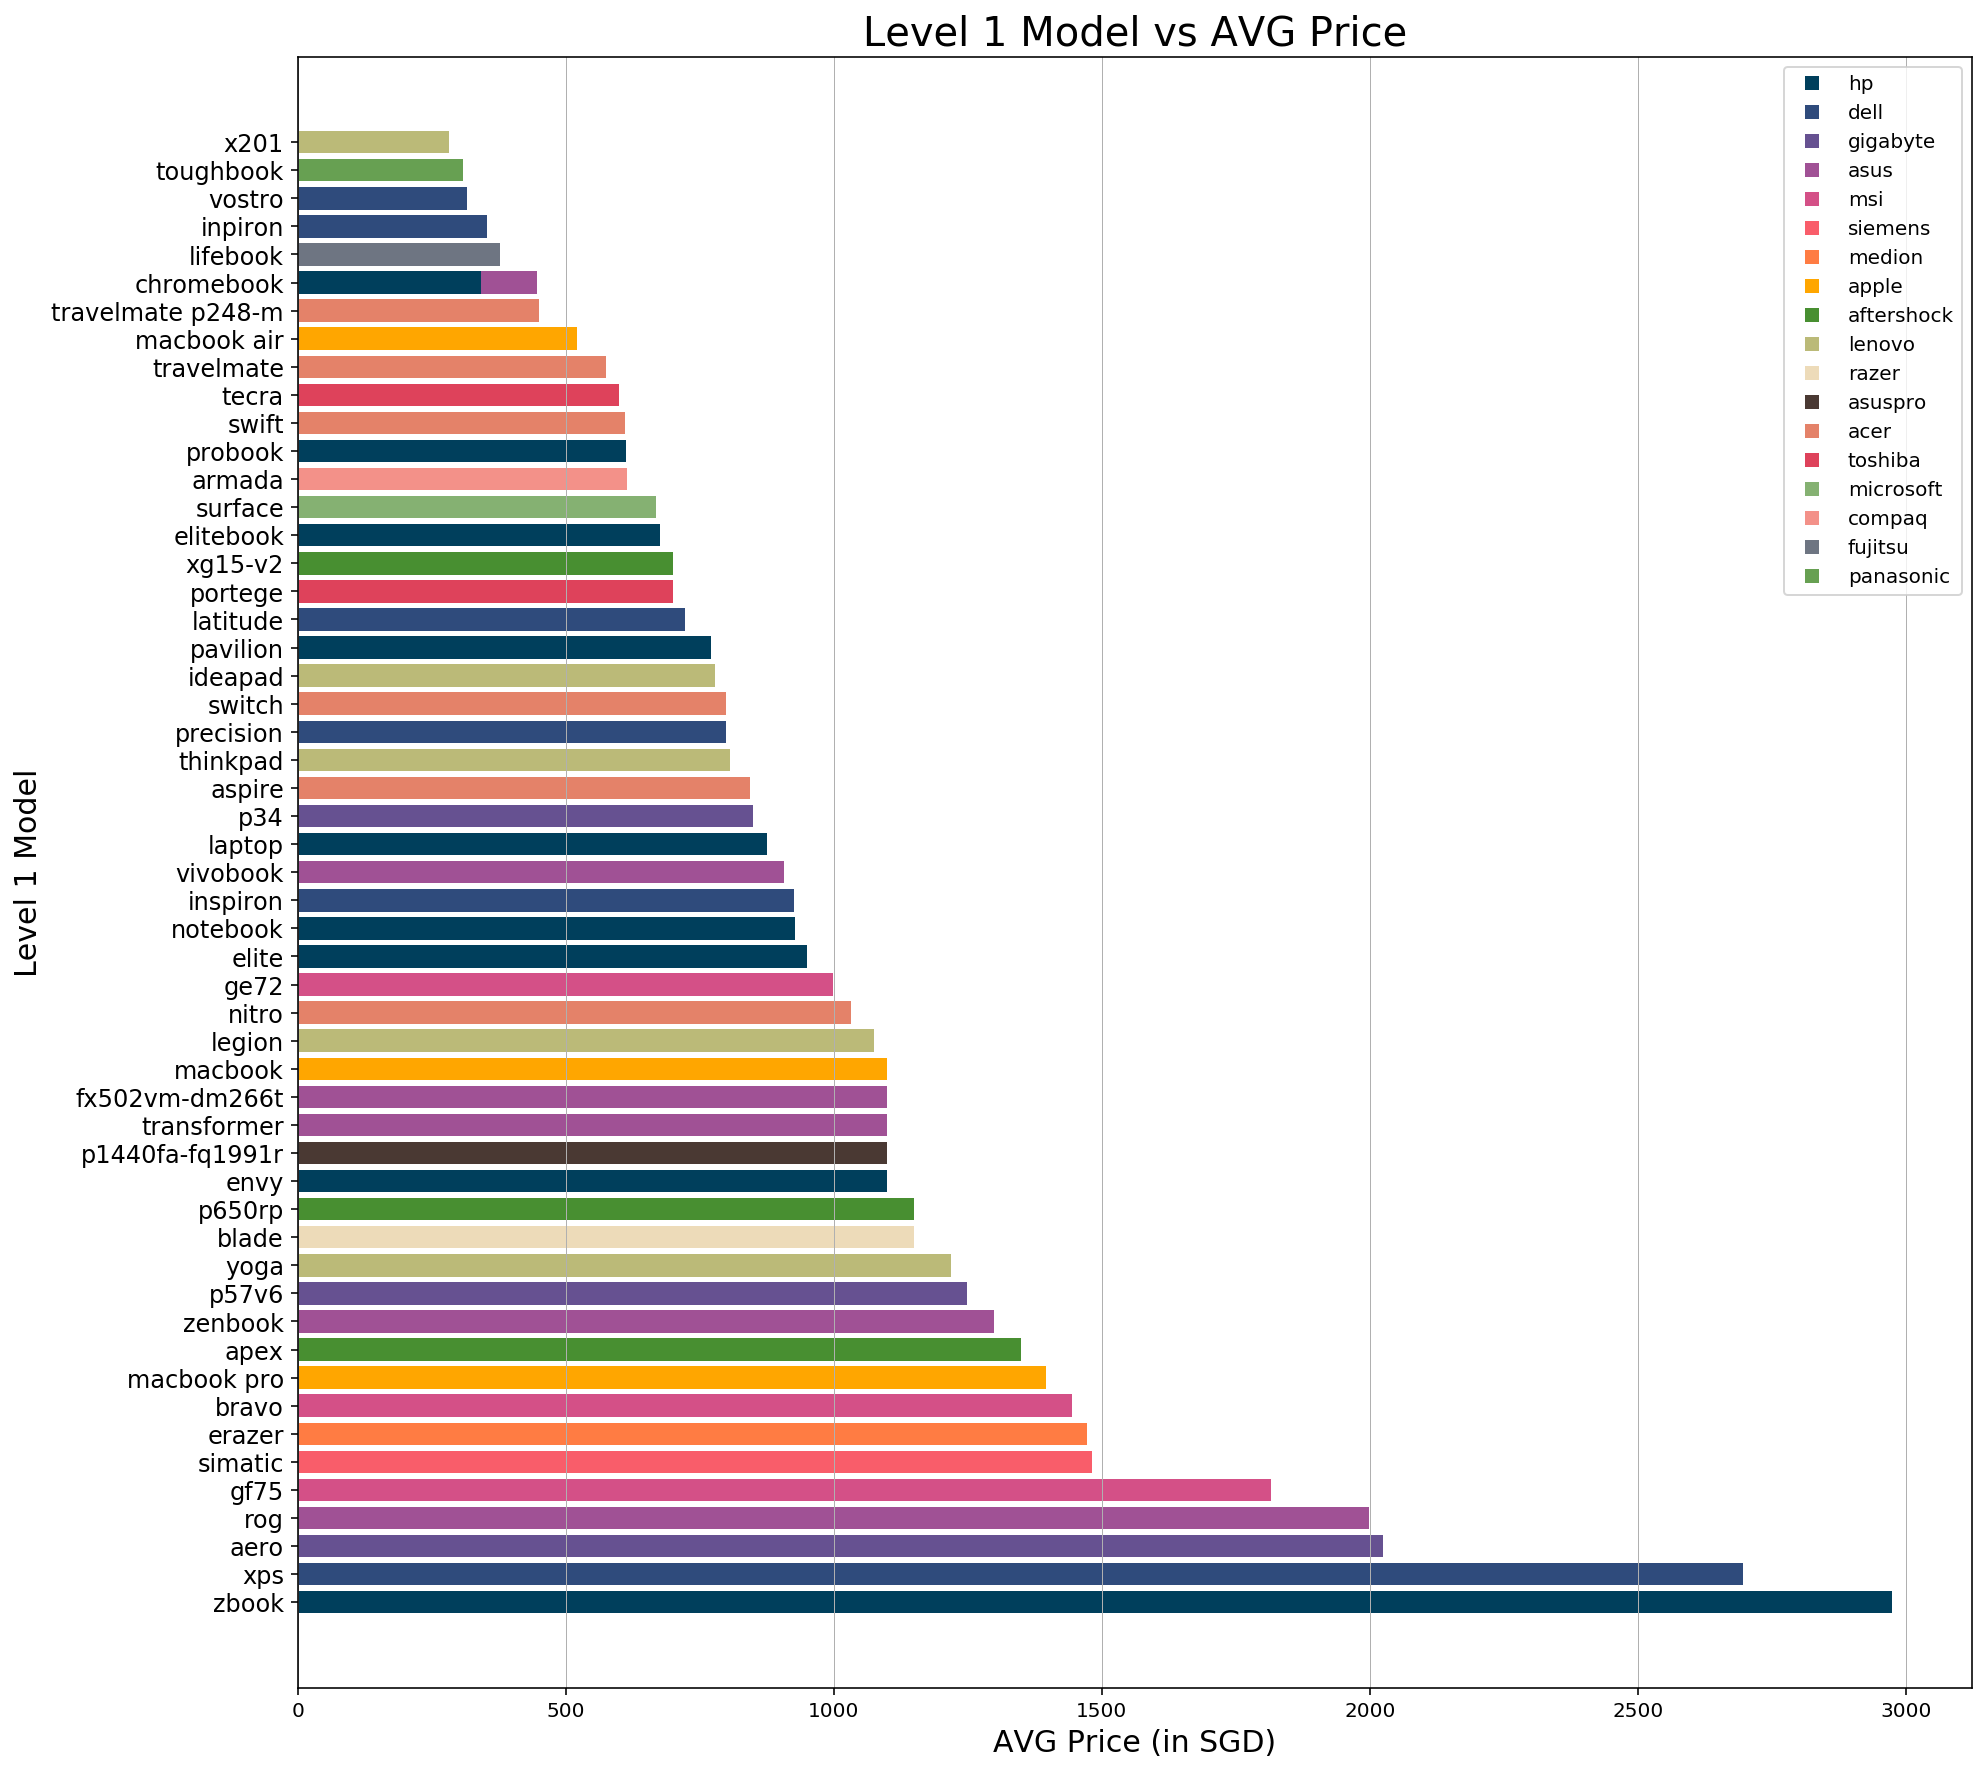

In [20]:
# version 3
colors_map = {'hp': '#003f5c', 
              'dell': '#2f4b7c', 
              'gigabyte': '#665191', 
              'asus': '#a05195', 
              'msi': '#d45087', 
              'siemens': '#f95d6a', 
              'medion': '#ff7c43',
              'apple': '#ffa600', 
              'aftershock': '#488f31', 
              'lenovo': '#bbba78', 
              'razer': '#eddbb9', 
              'asuspro': '#4a3933', 
              'acer': '#e48269',
              'toshiba': '#de425b', 
              'microsoft': '#85b172', 
              'compaq': '#f39189', 
              'fujitsu': '#6e7582', 
              'panasonic': '#67a052'}
plt.figure(figsize = (15,15))
plt.barh(price_brmodel.level_1_model, price_brmodel.price, color = list(price_brmodel.brand.map(colors_map)))
plt.ylabel('Level 1 Model', fontsize = 15)
plt.xlabel('AVG Price (in SGD)', fontsize = 15)
plt.yticks(fontsize = 12)
plt.grid(axis = 'x', linewidth = 0.5)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='s', linestyle='') for color in colors_map.values()]
plt.legend(markers,colors_map.keys(), numpoints=1)
plt.title('Level 1 Model vs AVG Price', fontsize = 20)

In [12]:
brand_c = df['brand'].value_counts()
brand_c.head()

lenovo    82
hp        54
dell      52
apple     43
asus      27
Name: brand, dtype: int64

Text(0.5, 1.0, 'Histogram of Brand')

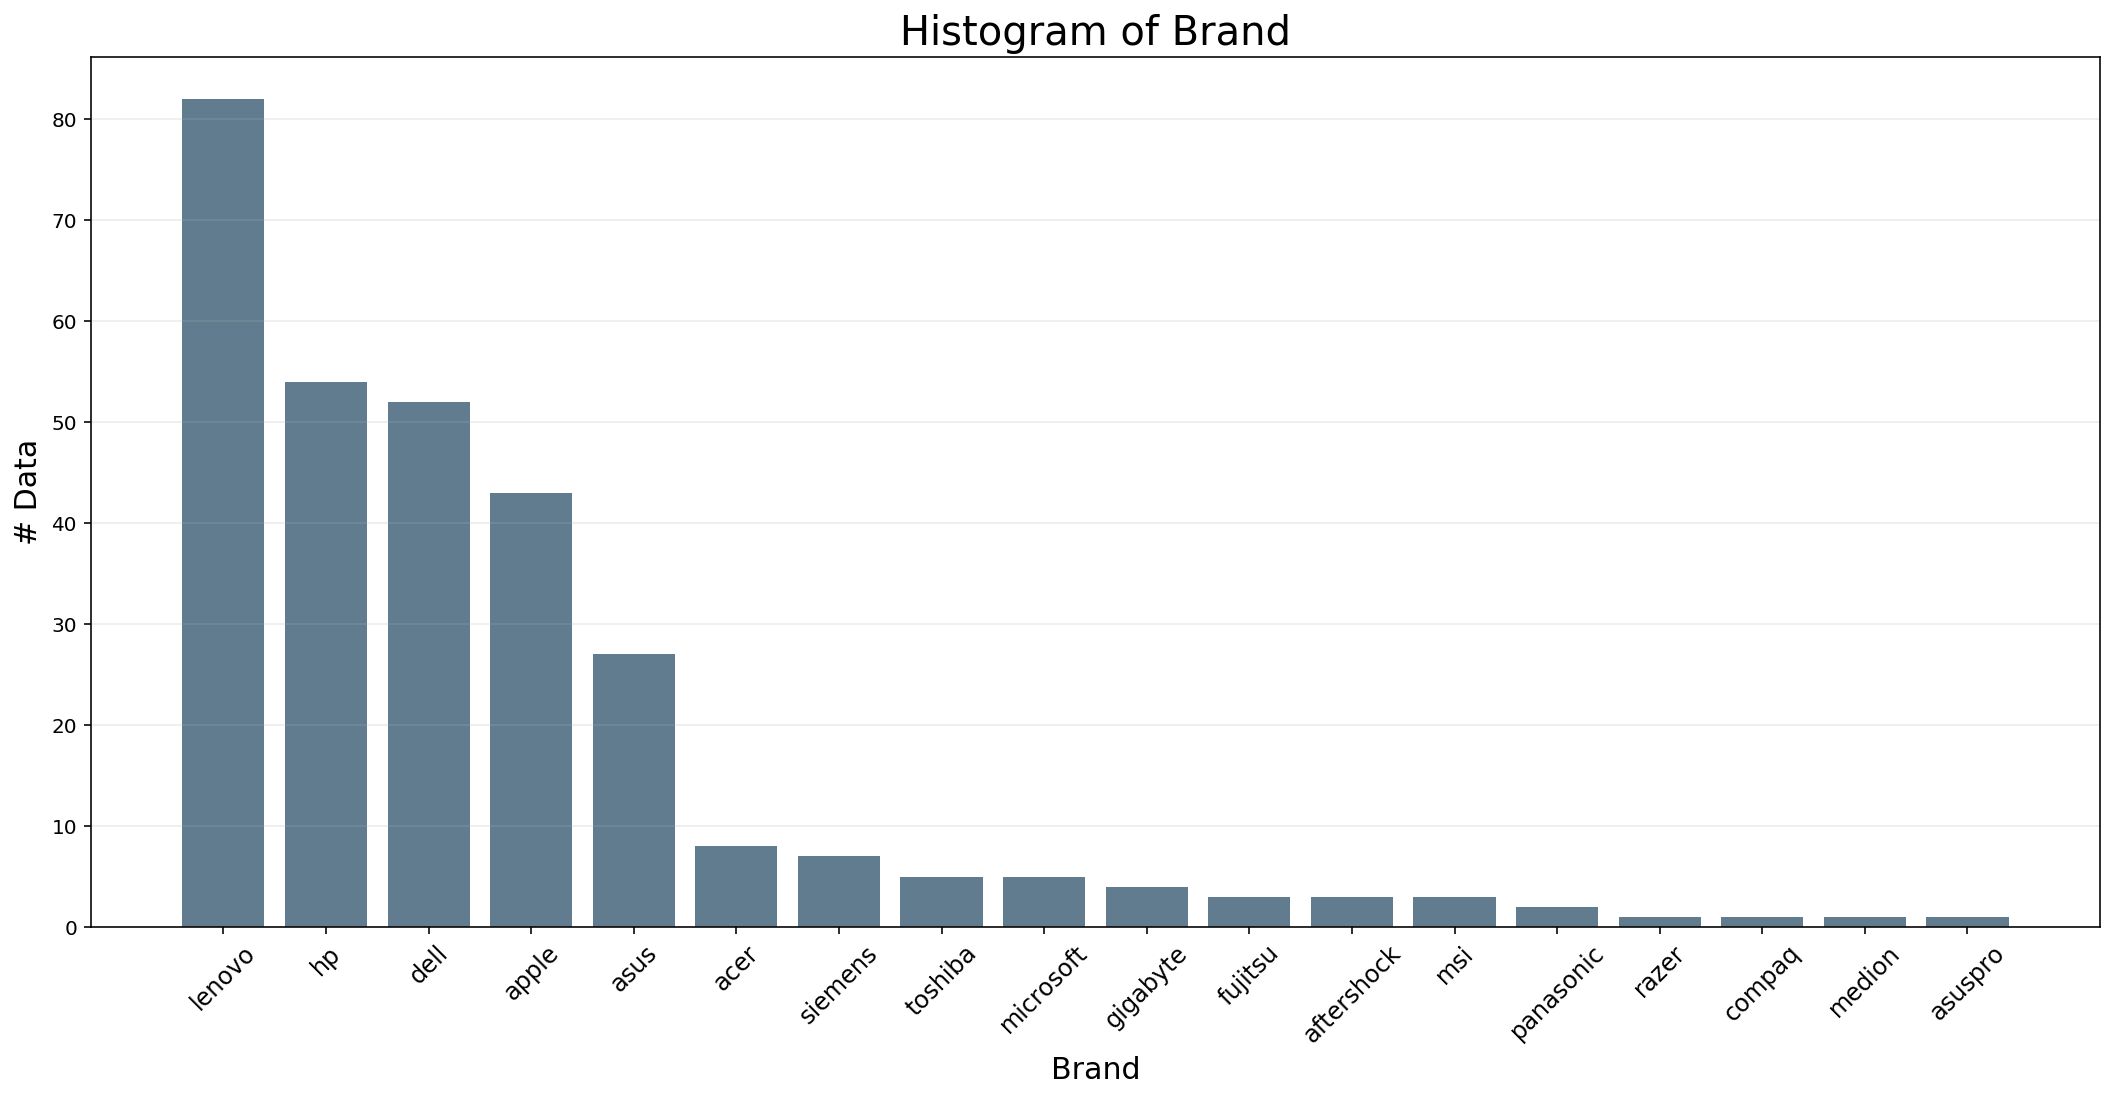

In [13]:
# Histogram of Brand
plt.figure(figsize = (18,8))
plt.bar(brand_c.index, brand_c, color = '#607c8e')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.grid(axis = 'y', linewidth = 0.2)
plt.title('Histogram of Brand', fontsize = 20)

In [14]:
l1model_c = df['level_1_model'].value_counts()
l1model_c.head()

thinkpad       62
latitude       42
macbook pro    30
elitebook      19
ideapad        13
Name: level_1_model, dtype: int64

Text(0.5, 1.0, 'Histogram of Level 1 Model')

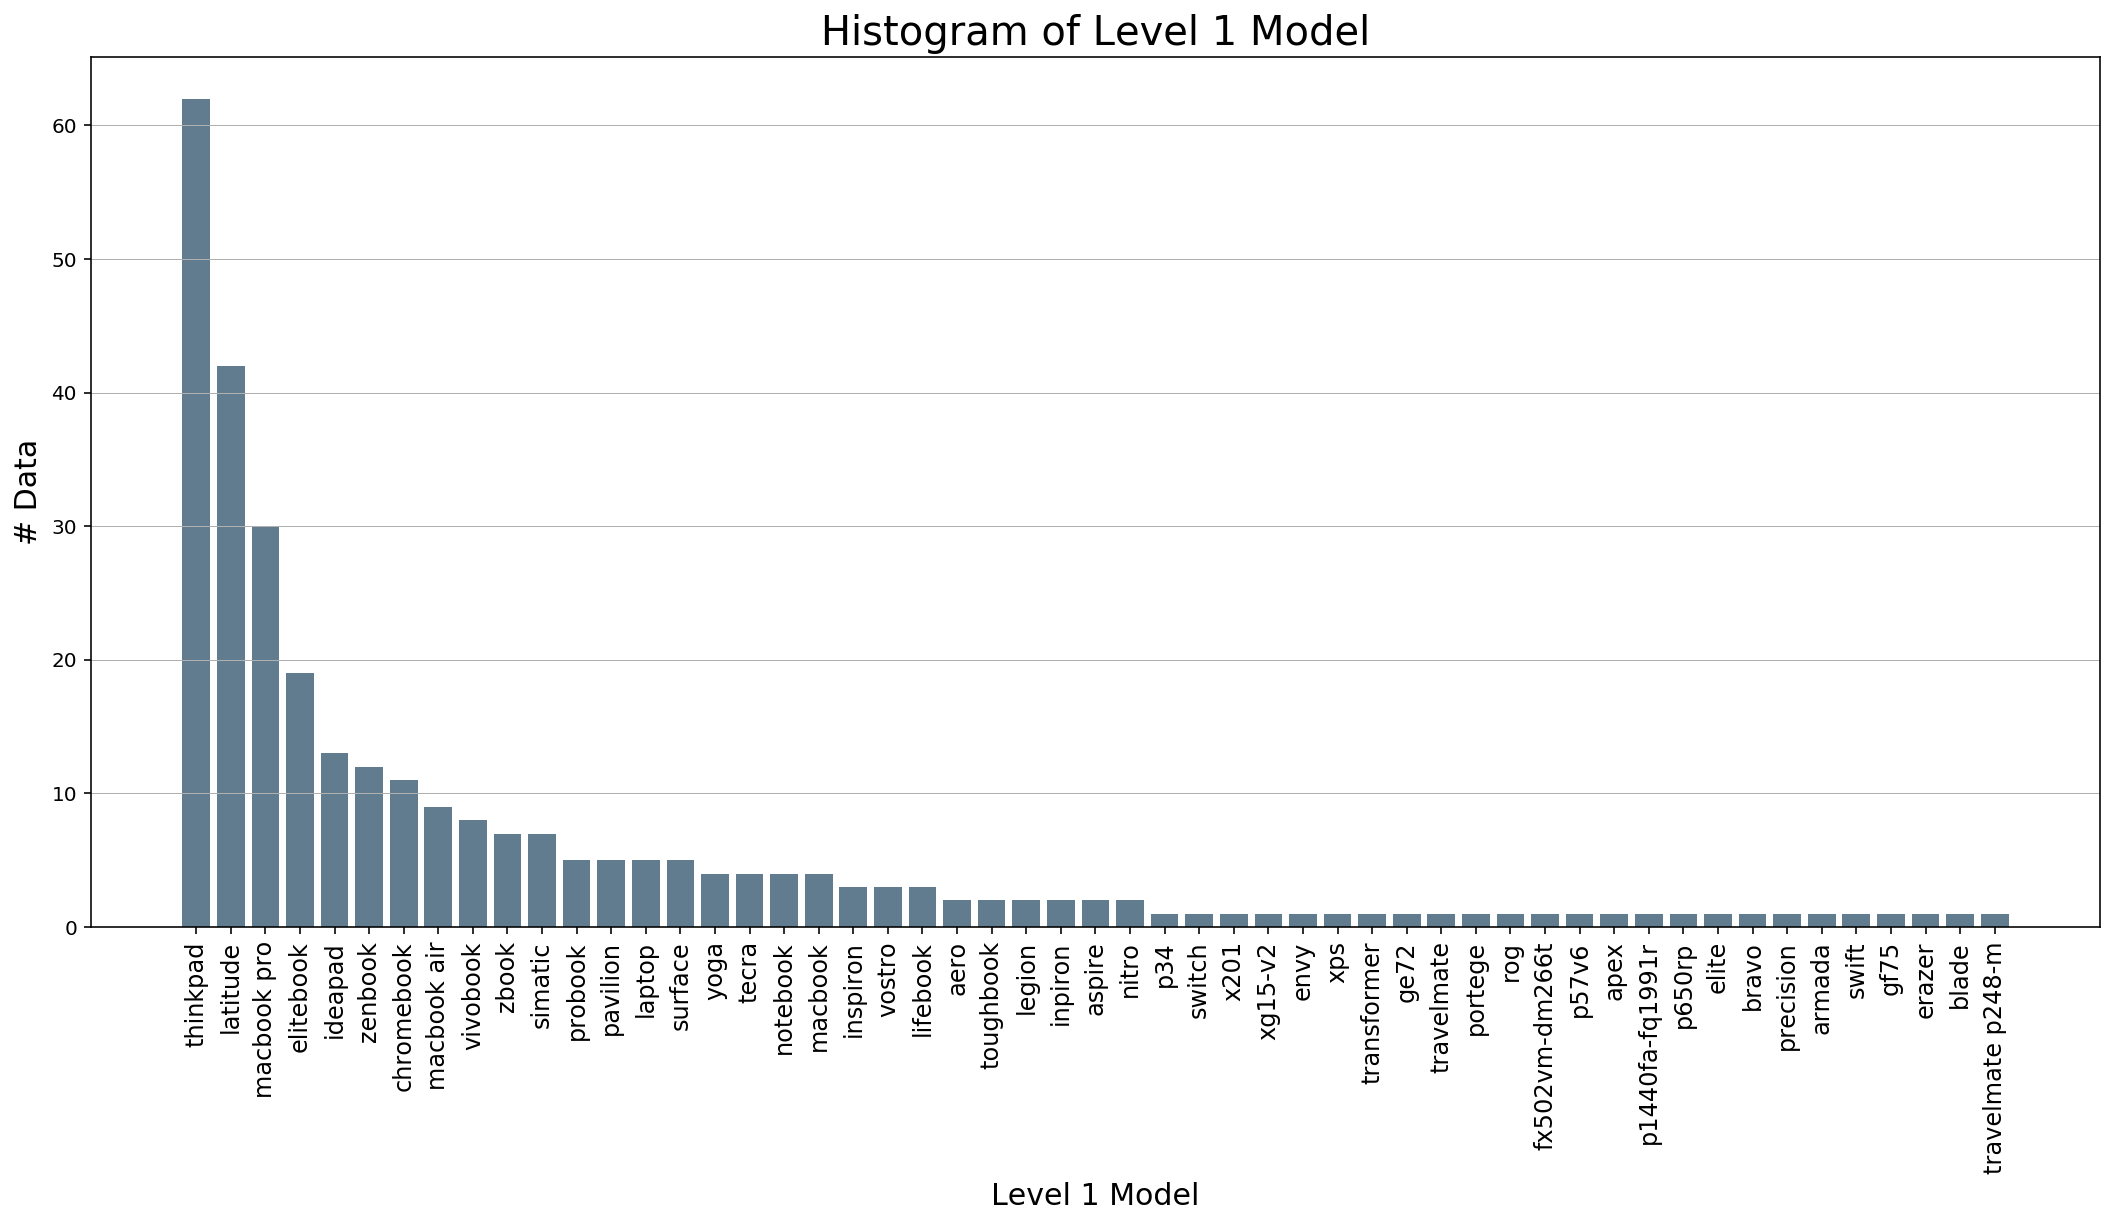

In [15]:
plt.figure(figsize = (18,8))
plt.bar(l1model_c.index, l1model_c, color = '#607c8e')
plt.xlabel('Level 1 Model', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.grid(axis = 'y', linewidth = 0.5)
plt.title('Histogram of Level 1 Model', fontsize = 20)

Text(0.5, 1.0, 'Histogram of Price')

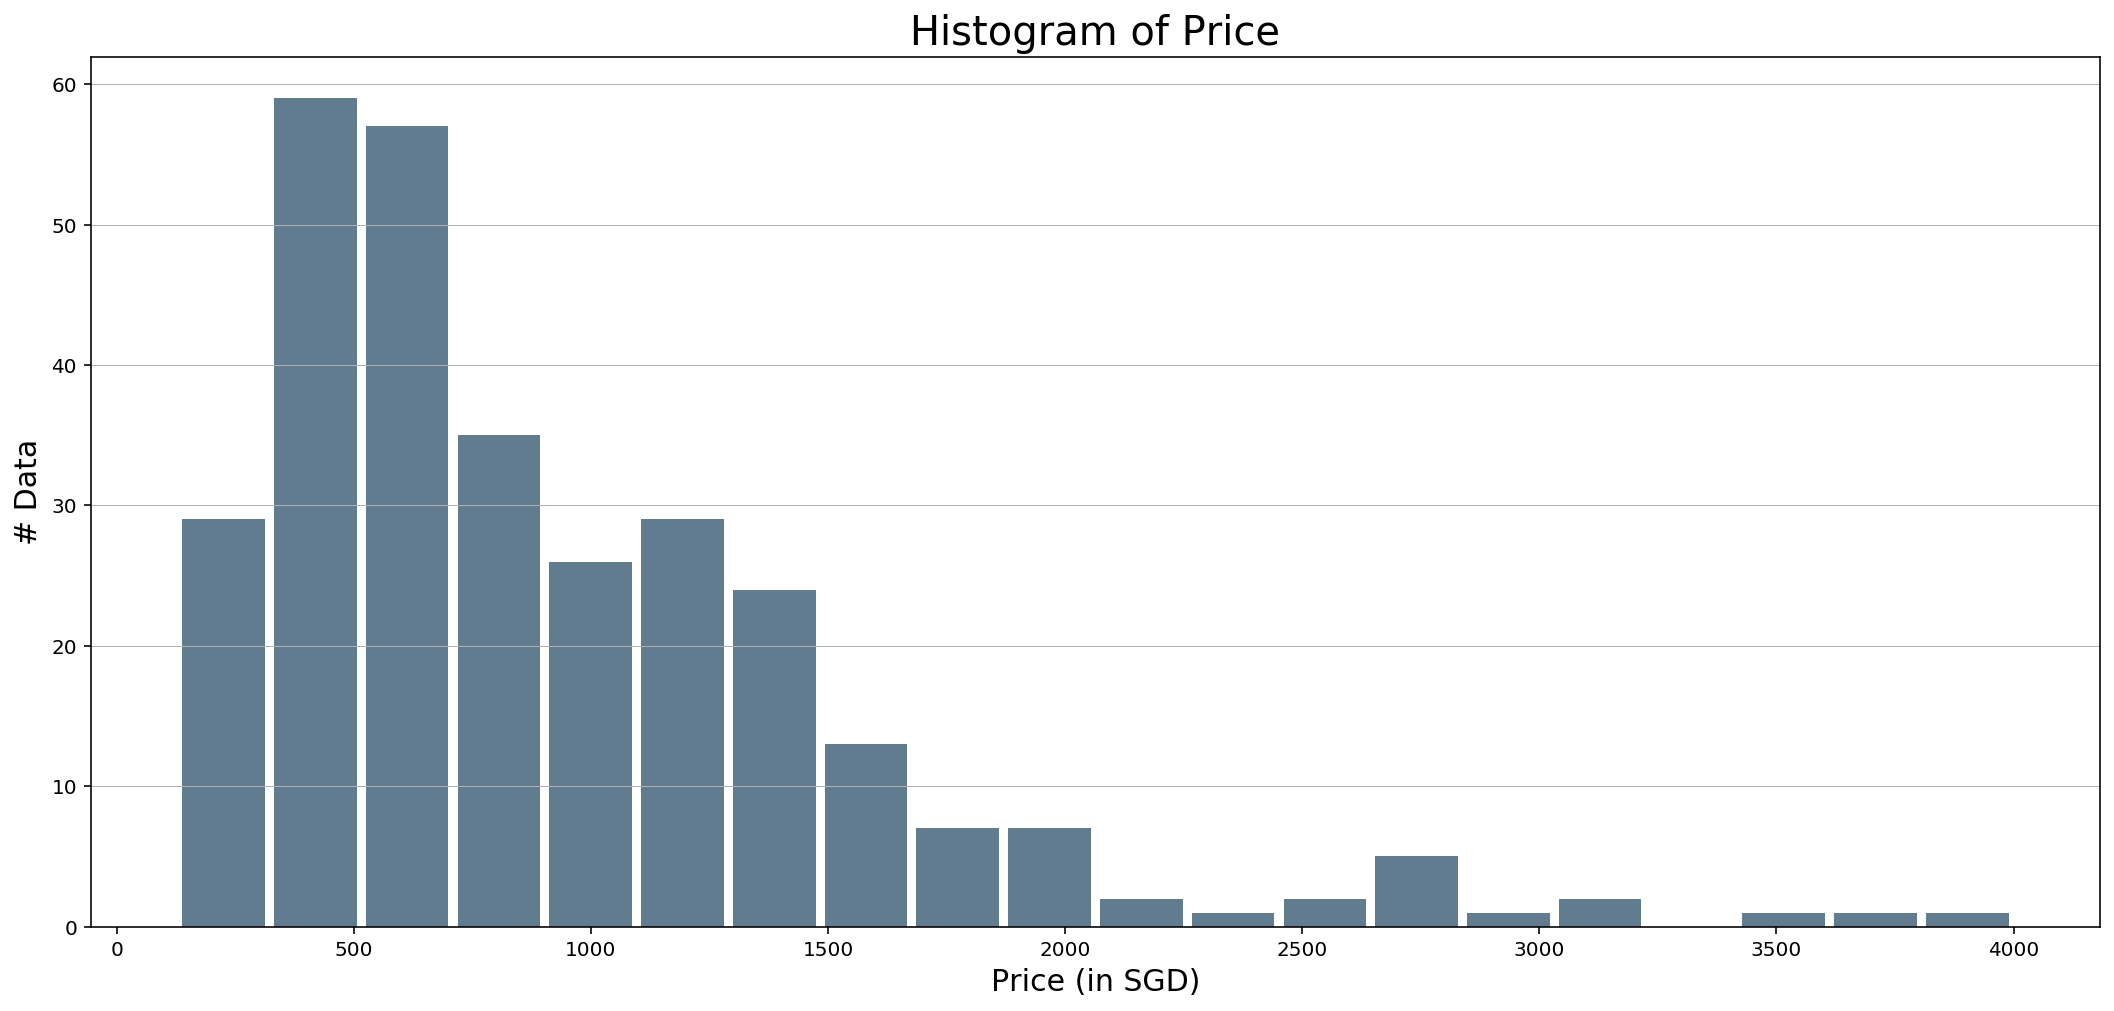

In [16]:
plt.figure(figsize = (18,8))
df['price'].plot.hist(bins = 20, rwidth = 0.9, color = '#607c8e')
plt.xlabel('Price (in SGD)', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
plt.title('Histogram of Price', fontsize = 20)

Text(0.5, 1.0, 'Histogram of Price with Boxcox Transformation')

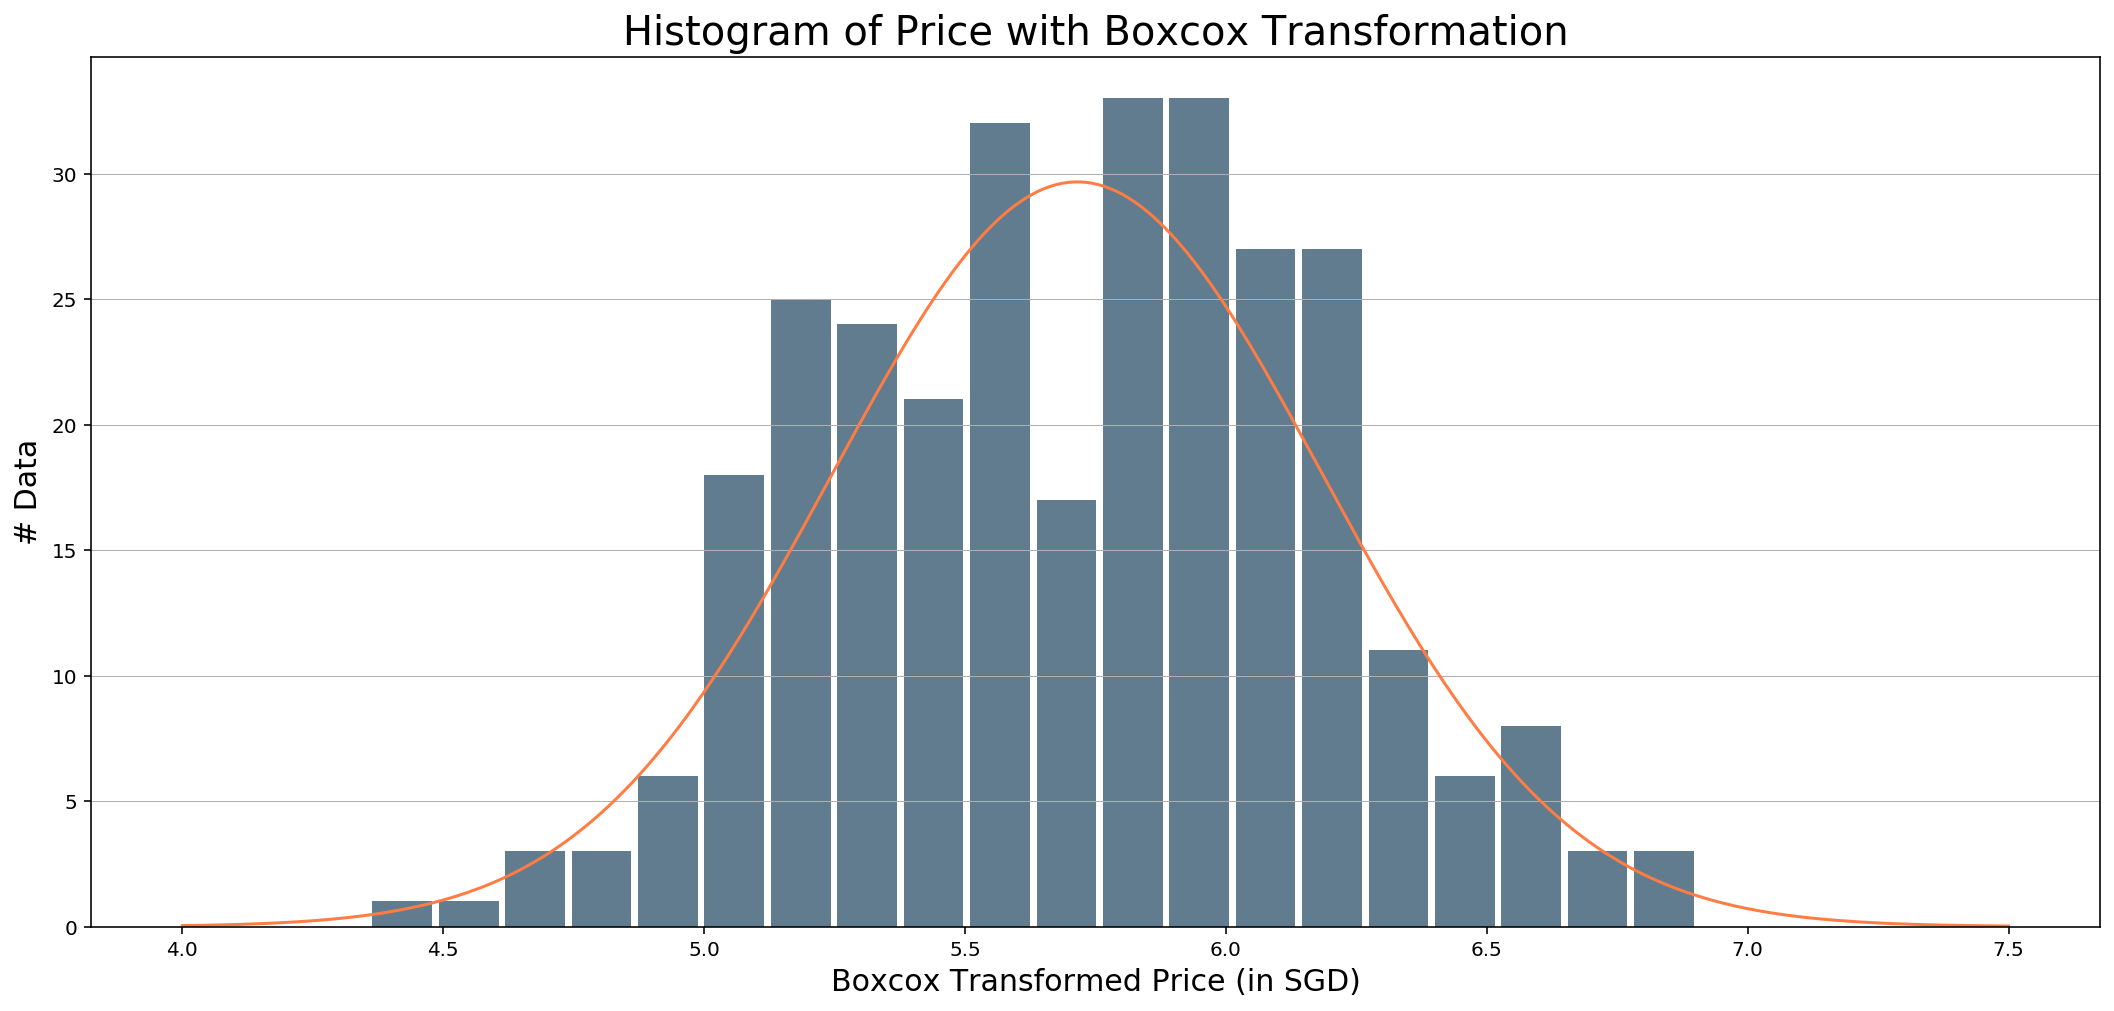

In [17]:
plt.figure(figsize = (18,8))
boxcox_price = pd.Series(stats.boxcox(df['price'])[0])
boxcox_price.plot.hist(bins = 20, rwidth = 0.9, color = '#607c8e')
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(boxcox_price))
mu, sigma = stats.norm.fit(boxcox_price)
height = max(plt.yticks()[0])
normal_pdf = stats.norm.pdf(lnspc,mu,sigma) * height
plt.plot(lnspc,normal_pdf, color ='#ff7c43')
plt.xlabel('Boxcox Transformed Price (in SGD)', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
plt.title('Histogram of Price with Boxcox Transformation', fontsize = 20)

In [18]:
mu, sigma = stats.norm.fit(boxcox_price)
print(mu, sigma)

5.715243962454022 0.47062835315157237


In [19]:
df.head()

,title,price,brand,resolution,screen_size,level_1_model,processor,processor_speed,ram,warranty,link,description,weight,hdd_gb,ssd_gb,graphic_card,hdd_exist,ssd_exist,graphic_card_exist,storage
0,(certified refurbished) apple macbook pro 13.3...,1230.0,apple,wqxga,13.3,macbook pro,intel core i5-4278u,2.6,16.0,1,https://www.electronicscrazy.sg/certified-refu...,certified refurbished from factory and high qu...,NaN,NaN,256.0,NaN,0,1,0,256.0
1,(certified refurbished) dell latitude e5470 14...,630.0,dell,fhd,14.0,latitude,intel core i5-6300u,2.4,8.0,1,https://www.electronicscrazy.sg/certified-refu...,certified refurbished from ec and high quality...,NaN,NaN,256.0,NaN,0,1,0,256.0
2,customized dell latitude e5440 core i5 4th gen...,370.0,dell,hd+,14.0,latitude,intel core i5-4300u,1.9,8.0,1,https://www.electronicscrazy.sg/customized-del...,economical price\nsold and shipped from singap...,2.2,500.0,NaN,NaN,1,0,0,500.0
3,certified refurbished dell inspiron core i5 3r...,310.0,dell,sxga,14.0,inpiron,intel core i5-450m,2.4,4.0,1,https://www.electronicscrazy.sg/certified-refu...,economical price\nprice matching guarantee\nso...,2.3,500.0,NaN,NaN,1,0,0,500.0
4,certified refurbished dell inspiron core i5 4t...,395.0,dell,sxga,14.0,inpiron,intel core i5-4210u,1.7,4.0,1,https://www.electronicscrazy.sg/certified-refu...,certified refurbished from ec and high quality...,2.5,500.0,NaN,NaN,1,0,0,500.0
